#Silhoutte Score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [ ]:
#MOntar el drive en colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Databases/Week 19/df_german_credit.csv')

In [ ]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,housing_encoded,sex_encoded
0,0,67,male,2,own,little,little,1169,6,radio/TV,1,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0
2,2,49,male,1,own,little,little,2096,12,education,1,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,1
4,4,53,male,2,free,little,little,4870,24,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment,1,0
996,996,40,male,3,own,little,little,3857,30,car,1,1
997,997,38,male,2,own,little,little,804,12,radio/TV,1,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,0,1


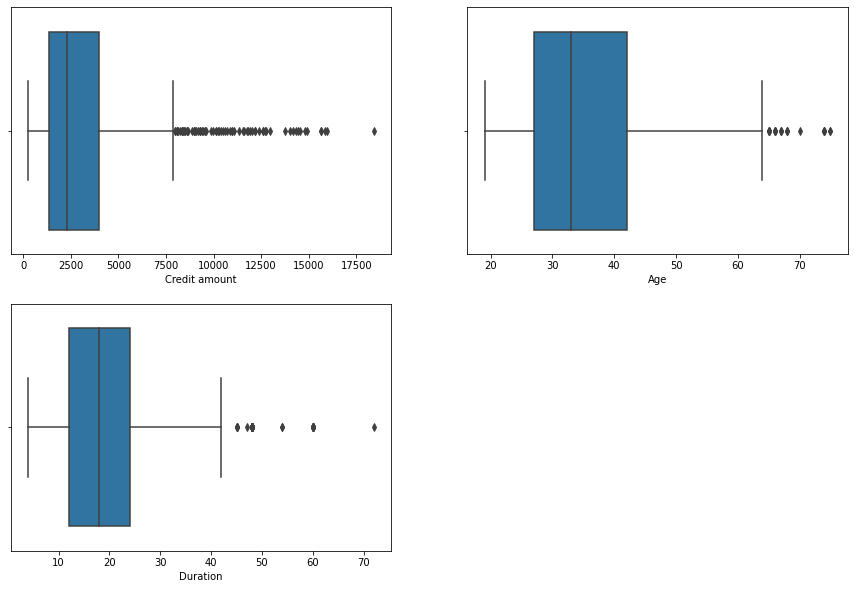

In [ ]:
#Desde aquí comenamos con 3 features nada más
numerical = ['Credit amount','Age','Duration']
# Graficando Outliers 
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    # three integers (nrows, ncols, index)
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

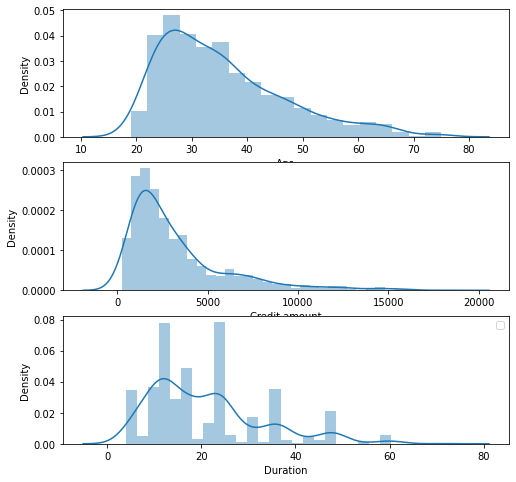

In [ ]:
# Vamos a ver la distribuciòn de nuestros datos
# No son simetricos, tienen sierta carga de informaciòn positiva (a la izquierda)
# ·Entonces, si dejamos asì lso datos el modelo va tender a predecir de mejor manera
# ·aquellos donde se concentra la gran cantidad de informacion
# Igual podemos ver outliers 
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df["Age"], ax=ax1)
sns.distplot(df["Credit amount"], ax=ax2)
sns.distplot(df["Duration"], ax=ax3)
# plt.tight_layout()
plt.legend()



In [ ]:
#Preparamos Datset con el cual empezaremos a visualziar en 3D
df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = df['Credit amount']
df_cluster['Age'] = df['Age']
df_cluster['Duration'] = df['Duration']

df_cluster.head()



,Credit amount,Age,Duration
0,1169,67,6
1,5951,22,48
2,2096,49,12
3,7882,45,42
4,4870,53,24


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

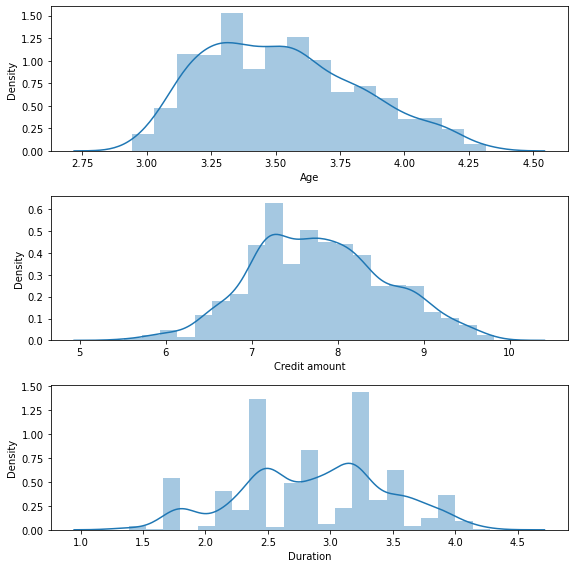

In [ ]:
#Log transformation helps reducing skewness when you have skewed data.
#https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8
#And it helps to reduce outliers
# https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

# When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” 
# as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation
# reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or 
# approximately follow a log-normal distribution. 

# It improves linearity between our dependent and independent variables.
#  It boosts validity of our statistical analyses. But we have to be cautious 
#  when it comes to interpreting the coefficients of log-transformed variables. 

df_cluster_log = np.log(df_cluster[['Age', 'Credit amount','Duration']])
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"], ax=ax1)
sns.distplot(df_cluster_log["Credit amount"], ax=ax2)
sns.distplot(df_cluster_log["Duration"], ax=ax3)
plt.tight_layout()



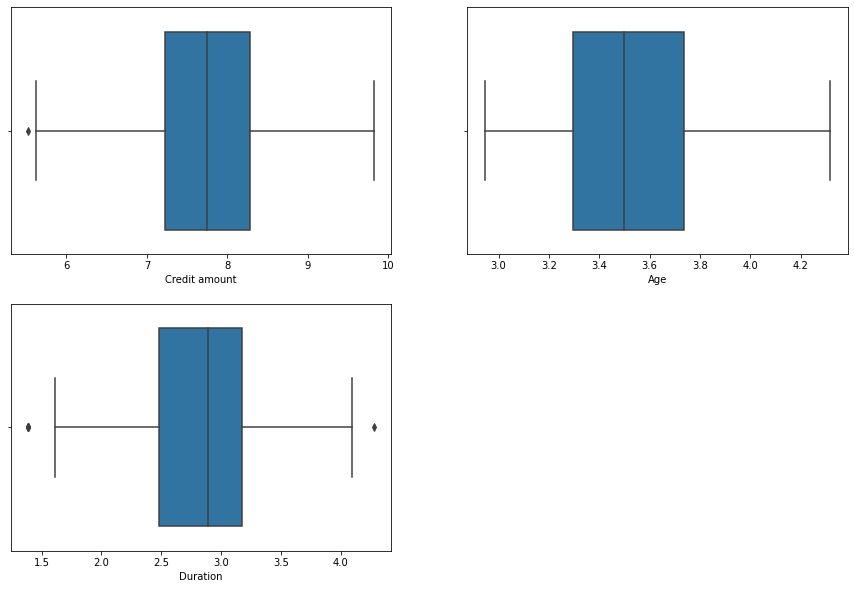

In [ ]:
#Ploteando outliers de nuevo
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df_cluster_log, x = num)
plt.show()



In [ ]:
df_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [ ]:
# ·CCOmo se ha mencionado anteriormente, los algoritmos son muy sensibles a datos
# no escalados En clusterización. Cpm StandardScalar tendremos una media de cero 
# y desviacion de 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

# Silhoutte Score

Mide la separabilidad entre clusters. Esta técnica mide la separabilidad entre grupos. Primero, se encuentra una distancia promedio entre cada punto y todos los demás puntos en un grupo. Luego mide la distancia entre cada punto y cada punto en otros grupos. Restamos las dos medidas promedio y dividimos por el promedio que sea mayor. \\

Nos ayuda a obtener numero de clusters optimo


In [ ]:
#Initialize variables
scores = []
inertias = []
values = np.arange(2, 10)


In [ ]:

# En última instancia, queremos una puntuación alta (es decir, más cercana a 1)
# que indicaría que hay una pequeña distancia promedio dentro del grupo 
# (grupos apretados) y una gran distancia promedio entre grupos (grupos bien separados).
for num_clusters in values:
    # Entrenamos KMEANS
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cluster_scaled)
    # Aplicamos Silhoutte score
    score = metrics.silhouette_score(cluster_scaled, kmeans.labels_, metric='euclidean', sample_size=len(cluster_scaled))
    
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)

    scores.append(score)
 
    
    


Number of clusters = 2
Silhouette score = 0.3153441336069185

Number of clusters = 3
Silhouette score = 0.3031893340877455

Number of clusters = 4
Silhouette score = 0.2676589673178006

Number of clusters = 5
Silhouette score = 0.2670647512579886

Number of clusters = 6
Silhouette score = 0.265332405495315

Number of clusters = 7
Silhouette score = 0.2589088783878425

Number of clusters = 8
Silhouette score = 0.25995758893009513

Number of clusters = 9
Silhouette score = 0.2529371711659815


Text(0.5, 1.0, 'Silhouette score vs number of clusters')

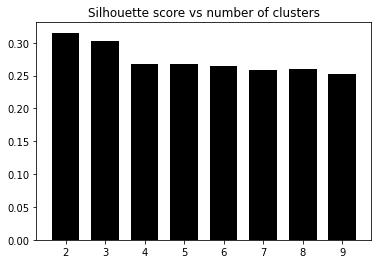

In [ ]:
# ·Vemos cluster con mejor silhoutte
plt.figure()
plt.bar(values, scores, width=0.7, color='k', align='center')
plt.title('Silhouette score vs number of clusters')

In [ ]:
#extract the best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters = ', num_clusters)


Optimal number of clusters =  2


#Elbow Method
Intuitivamente, la **inercia** dice qué tan lejos están los puntos dentro de un grupo. Por lo tanto, se busca un poco de inercia. El rango del valor de la inercia comienza desde cero y aumenta.

El resultado es un gráfico de líneas que muestra la suma de las distancias al cuadrado en cada grupo. Queremos seleccionar el número de conglomerados en el codo del gráfico de líneas o la suma más baja de distancias al cuadrado (es decir, inercia) en el número más bajo de conglomerados.
Cuanto menor sea la suma de las distancias de los cuadrados, los datos dentro de cada grupo están agrupados más estrechamente.

Incercia: Se define como la distancia cuadrática media entre cada instancia y su centroide más cercano. Lógicamente, según la definición, bajar la inercia mejor el modelo.



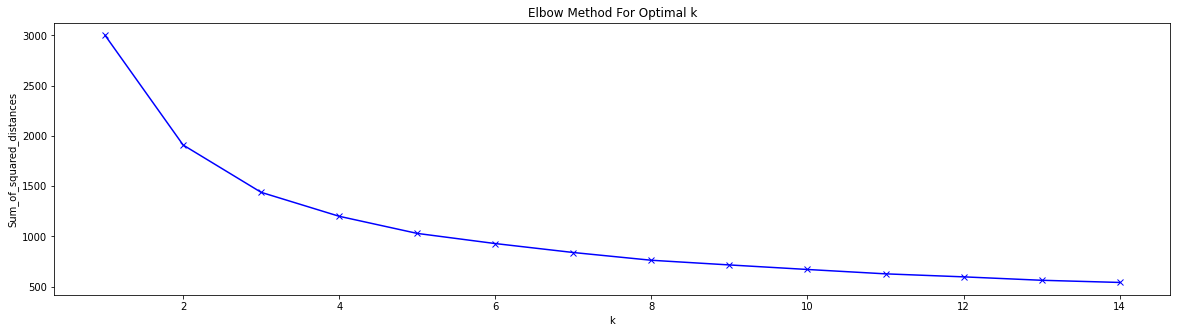

In [ ]:

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


# Visualización 3D

K-Means


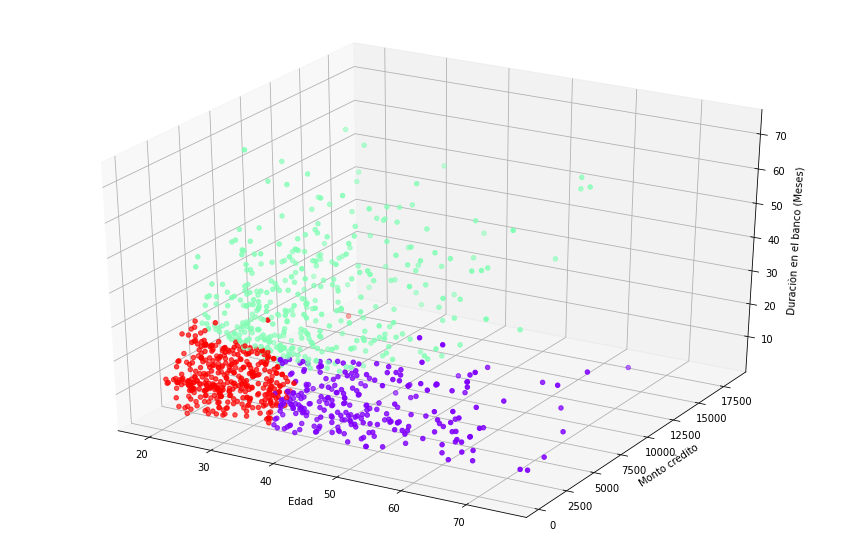

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# ·Haciendo fitting de KMEANS
model = KMeans(n_clusters=3, random_state=123)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

# Plotteando figura
fig = plt.figure(num=None, figsize=(15, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
# ·Plotteando 3D
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Edad', linespacing=3.2)
yLabel = ax.set_ylabel('Monto crèdito', linespacing=3.1)
zLabel = ax.set_zlabel('Duraciòn en el banco (Meses)', linespacing=3.4)

print("K-Means")

In [ ]:
#Visualizacion en 3D
import plotly.graph_objs as go
#Creamos el lienzo del grafico
escena  = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Credit amount'),zaxis = dict(title  = 'Duration'))
#Etiquetas del cluster
labels = kmeans_labels
#Graficamos los puntitos
puntitos = go.Scatter3d(x=df_cluster['Age'], y=df_cluster['Credit amount'], z=df_cluster['Duration'], mode='markers',marker=dict(color = labels, colorscale='rainbow', size = 10, line = dict(color = 'gray',width = 5)))
#Layout de nuestra escena
layout = go.Layout(margin=dict(l=0,r=0),scene = escena , height = 1000,width = 1000)
data = [puntitos]
#Unimos lienzo, layout y datos
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# Vamos a ver como se ve nuestro cluster en DF
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit amount,Age,Duration
Cluster,,,
0,1978.7,48.7,13.9
1,5665.4,34.0,32.2
2,1733.6,27.8,14.2


Cluster 0 : Higher credit amount, middle-aged, long duration customers **VERDEs** \\
Cluster 1 : Lower credit amount, young, short duration customers **ROJOS** \\
Cluster 2 : Lower credit amount, old, short duration customers **Morados**

##Agglomerative Clustering

Agglomerative Clustering es un miembro de la familia Hierarchical Clustering que funciona fusionando cada grupo con el proceso que se repite hasta que todos los datos se han convertido en un solo grupo.

Los pasos que da el agrupamiento aglomerativo son:

1. Cada punto de datos se asigna como un solo grupo
2. Determine la medida de la distancia y calcule la matriz de distancia
3. Determinar los criterios de vinculación para fusionar los clústeres.
4. Actualizar la matriz de distancias
5. Repita el proceso hasta que cada punto de datos se convierta en un grupo

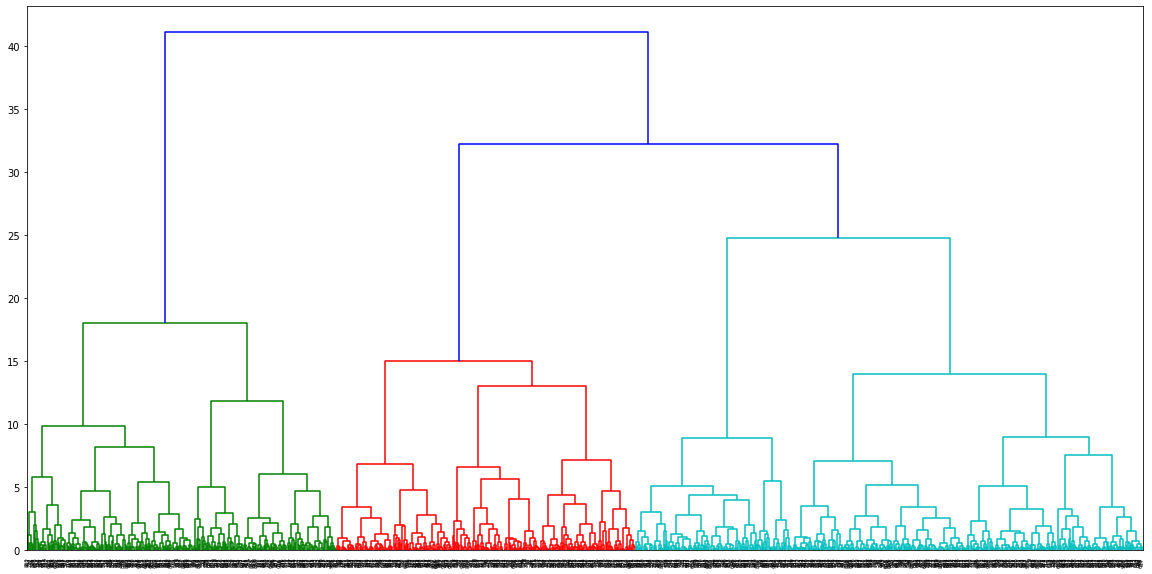

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

In [ ]:
# Silhoutte score con agglomerative Clustering
# ·Clustering agglomerativo. Es jerarquico pero a diferencia de HDBSCA nos pide el
# Numero de clusters a encontrar
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering
for num_clusters in values:
    # Entrenamos KMEANS
    ac = AgglomerativeClustering(n_clusters=num_clusters)
    ac.fit(cluster_scaled)
    # Aplicamos Silhoutte score
    score = metrics.silhouette_score(cluster_scaled, ac.labels_, metric='euclidean', sample_size=len(cluster_scaled))
    
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)

    scores.append(score)


Number of clusters = 2
Silhouette score = 0.2715239252669289

Number of clusters = 3
Silhouette score = 0.24114611066359173

Number of clusters = 4
Silhouette score = 0.23516132192529002

Number of clusters = 5
Silhouette score = 0.22637878611347736

Number of clusters = 6
Silhouette score = 0.20657375240773734

Number of clusters = 7
Silhouette score = 0.20077965194694677

Number of clusters = 8
Silhouette score = 0.20797768642134373

Number of clusters = 9
Silhouette score = 0.2053220139842984


Hierarchical Agglomerative Clustering


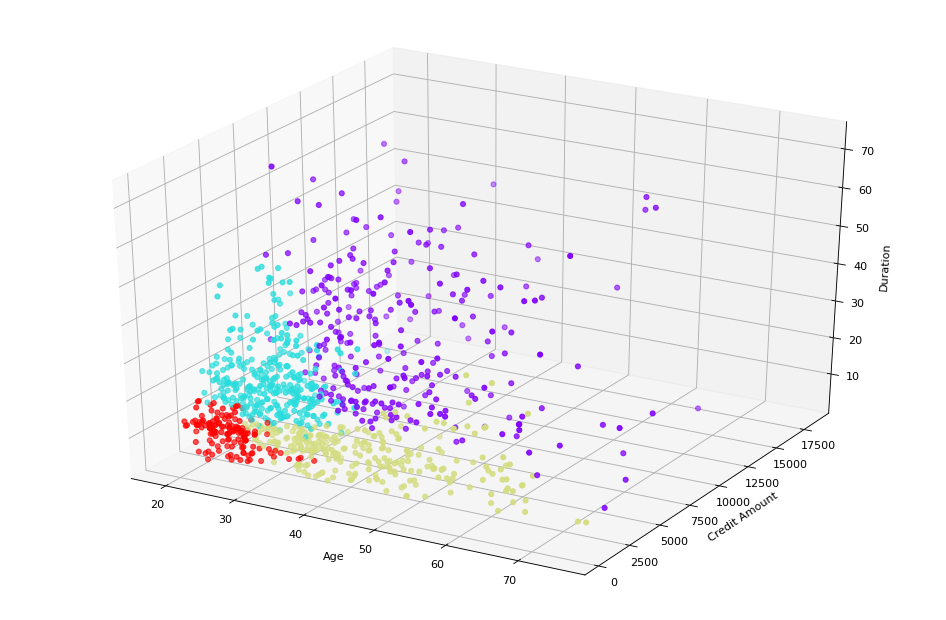

In [ ]:

model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [ ]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Credit amount,Age,Duration
Cluster,,,
0,6477.0,40.4,32.0
1,2748.0,28.8,23.6
2,1644.1,44.0,11.7
3,1231.5,25.1,10.6


##DBSCAN

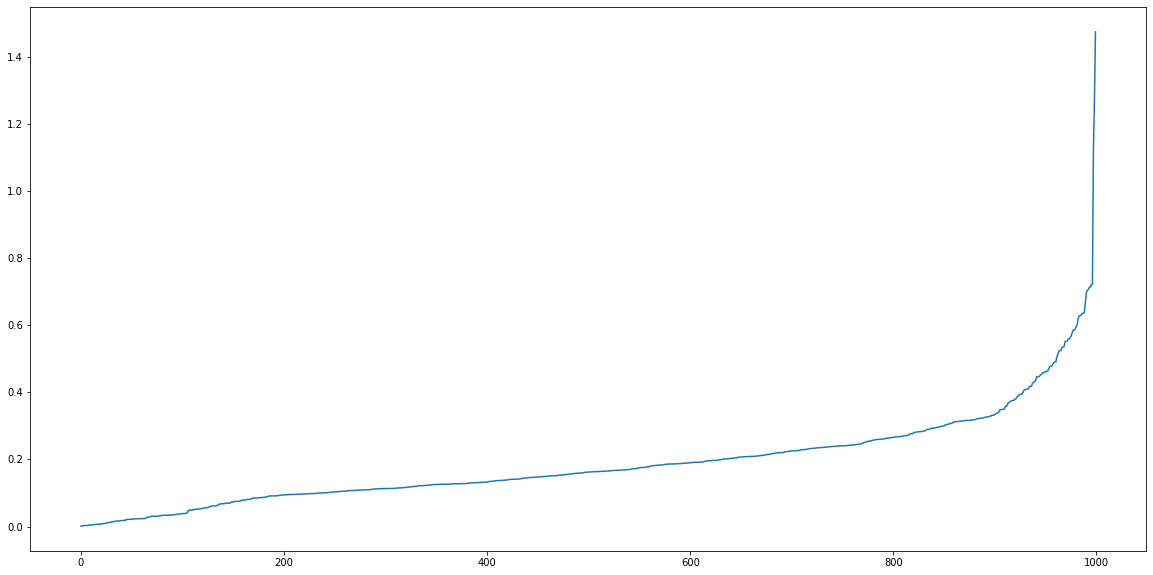

In [ ]:
# Implementamos algoritmo NearestNeighbors no supervisado
# nos regresa la distancia optima donde la curva se dispara
from sklearn.neighbors import NearestNeighbors
# ‘ball_tree’ usará algoritmo BallTree
# ‘kd_tree’ usará algoritmo KDTree
# ‘brute’ usará brute-force search.
# ‘auto’ intentará elegir el algoritmo más apropiado basado en los valores pasados
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(cluster_scaled)
# Regresa la distancia
distances, indices = nearest_neighbors.kneighbors(cluster_scaled)
distances = np.sort(distances, axis=0)[:, 1]
plt.figure(figsize=(20,10)) 
plt.plot(distances)
plt.show()

DBSCAN


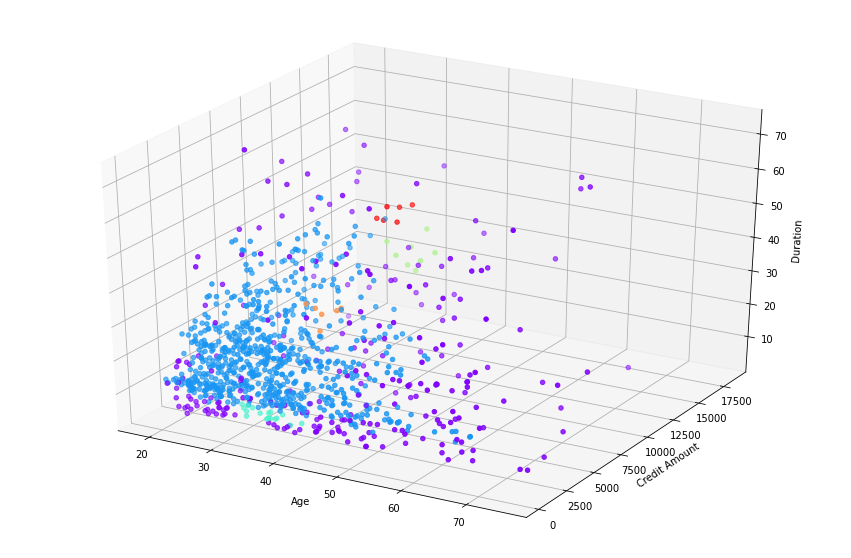

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=.4,min_samples=8)
model.fit(cluster_scaled)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("DBSCAN")

#PCA 
La información o la variación de nuestras características originales se "comprime" en lo que PCA llama componentes principales (PC). La primera PC contendrá la mayor parte de la información de las funciones originales. La segunda PC contendrá la siguiente mayor cantidad de información, la tercera PC la tercera mayor cantidad de información y así sucesivamente.

De esta manera, podemos realizar un análisis con solo 2 o 3 componentes principales en lugar de 50 características, mientras mantenemos entre el 80 y el 90% de la información de nuestras características originales.


In [ ]:
# ·Dataset de iris
from sklearn.datasets import load_iris
iris_data=load_iris()



In [ ]:
# Datos
df_data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names,index=None)
# Target
df_target=pd.DataFrame(iris_data.target,columns=['class'])
#Imaginando que son UNSUPERVISED
df_target.loc[df_target['class'] ==0, 'Target_names'] = 'setosa'
df_target.loc[df_target['class'] ==1, 'Target_names'] = 'versicolor'
df_target.loc[df_target['class'] ==2, 'Target_names'] = 'virginica'
# target_names=iris_data.target_names
# print('features :\n',df_data.head(5))
# print('labels :\n',df_target)

In [ ]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df_target

,class,Target_names
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


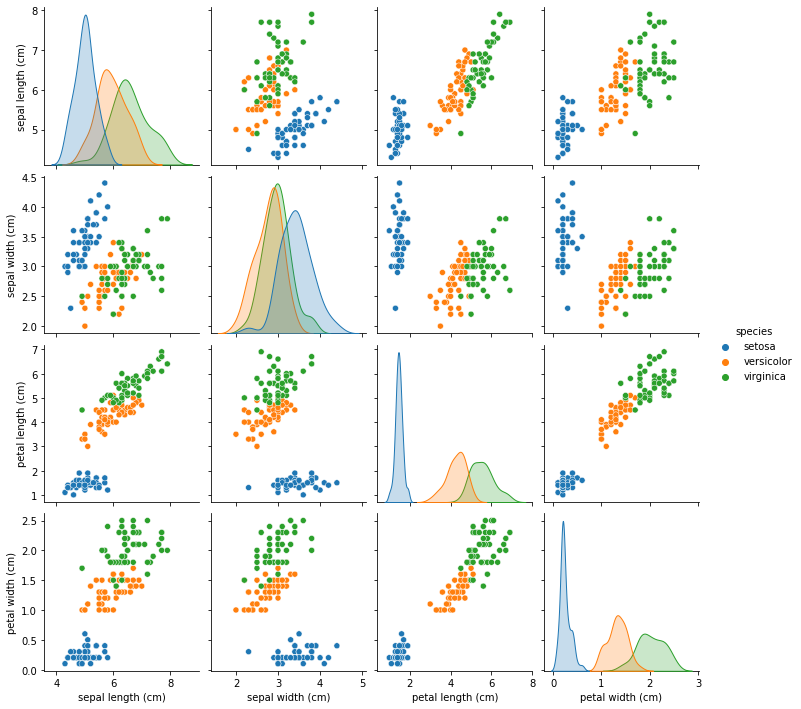

In [ ]:
df_data['species']=df_target['Target_names']
sns.pairplot(data=df_data,kind='scatter', hue='species')

In [ ]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
df_data=df_data.drop(['species'],axis=1)
standardized_data = StandardScaler().fit_transform(df_data)

In [ ]:
from sklearn.decomposition import PCA

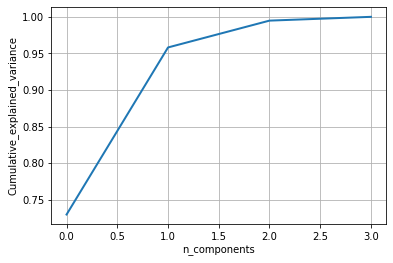

In [ ]:
#importamos PCA
pca=PCA()
#renombramos nuestro dataset
sample_data=standardized_data
#Nuestros componentes de pca (features que tenemos)
pca.n_components = 4
#Aplicamos el transform
pca_data = pca.fit_transform(sample_data)
#varianza explicada
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
#varianza explicada acumuladoata
cum_var_explained = np.cumsum(percentage_var_explained)
# Ploteamos la informacion
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
#2 COMPONENTES OBTENIDOS DE NUESTRO PCA
pca.n_components = 2
#Aplicamos la transformacion aneustros datos
pca_data = pca.fit_transform(sample_data)
#creamos df con los componentes de pcs
df_pca= pd.DataFrame(data = pca_data , columns = ['principal_component_1', 'principal_component_2'])

In [ ]:
#Vamos a ver cual explica cual
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns = df_data.columns.values,
                           index = ['principal_component_1', 'principal_component_2']
                           )

df_pca_comp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
principal_component_1,0.521066,-0.269347,0.580413,0.564857
principal_component_2,0.377418,0.923296,0.024492,0.066942


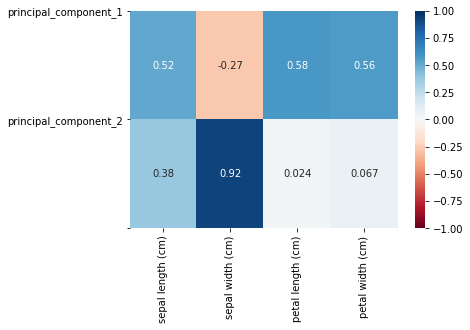

In [ ]:
#Heatmap para verlo mas claro
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap='RdBu',
            annot=True
            )
plt.yticks([0,1,2],
           ['principal_component_1', 'principal_component_2']
           );

In [ ]:
#Concatenamos a los componetens de PCA los targets
df_pred = pd.concat([df_pca,df_target],axis=1)

In [ ]:
df_pred

,principal_component_1,principal_component_2,class,Target_names
0,-2.264703,0.480027,0,setosa
1,-2.080961,-0.674134,0,setosa
2,-2.364229,-0.341908,0,setosa
3,-2.299384,-0.597395,0,setosa
4,-2.389842,0.646835,0,setosa
...,...,...,...,...
145,1.870503,0.386966,2,virginica
146,1.564580,-0.896687,2,virginica
147,1.521170,0.269069,2,virginica
148,1.372788,1.011254,2,virginica


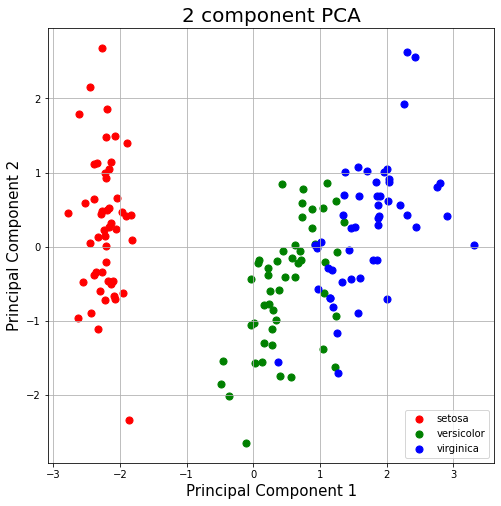

In [ ]:
#Graficamos a ver si si concuerda con nuestros graficos de arriba
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices_targets = df_pred['Target_names'] == target
    ax.scatter(df_pred.loc[indices_targets, 'principal_component_1']
               , df_pred.loc[indices_targets, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#TSNE

Al igual que PCA, t-SNE toma datos de alta dimensión y los reduce a un gráfico de baja dimensión (normalmente 2-D). También es una gran técnica de reducción de dimensionalidad. A diferencia de PCA, t-SNE puede reducir dimensiones con relaciones no lineales. En otras palabras, si nuestros datos tuvieran esta distribución no lineal “Swiss Roll” donde el cambio en X o Y no se corresponde con un cambio constante en la otra variable. 

 no podría destilar con precisión estos datos en componentes principales. Esto se debe a que PCA intentaría trazar la línea de mejor ajuste a través de la distribución. T-SNE sería una mejor solución en este caso porque calcula una medida de similitud basada en la distancia entre puntos en lugar de intentar maximizar la varianza.

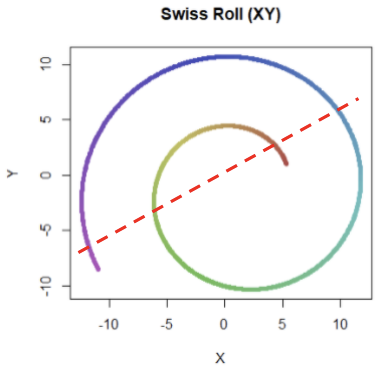

Una última cosa que necesitamos discutir sobre t-SNE es la “perplejidad”, que es un parámetro requerido cuando se ejecuta el algoritmo. 

La “perplejidad” determina cuán amplio o cuán estrecho de un espacio t-SNE captura similitudes entre puntos. Si su perplejidad es baja (quizás 2), t-SNE solo usará dos puntos similares y producirá un gráfico con muchos grupos dispersos. Sin embargo, cuando aumentamos la perplejidad a 10, t-SNE considerará 10 puntos vecinos como similares y los agrupará, lo que dará como resultado grupos de puntos más grandes.

Por lo general, establecemos la perplejidad entre 5 y 50, según el artículo publicado original.



One of the main limitations of t-SNE is its high computational costs. If you have a very large feature set it might be good to first use PCA to reduce the number of features to a few principal components and then use t-SNE to further reduce the data to 2 or 3 clusters.

In [ ]:
len(sample_data)

150

In [ ]:

from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5,12, 30, 50]):
    tsne = TSNE(perplexity=perp,random_state=123)
    x_embedded = tsne.fit_transform(sample_data)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=df_pred['class'])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

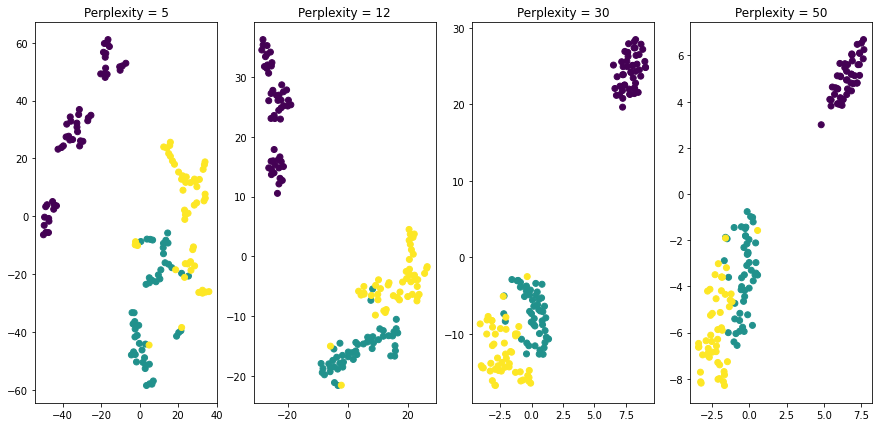

In [ ]:

# https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
from sklearn.manifold import TSNE


# Creamos subplots
# https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
# Generamos Perplejidades
# OBTENER LA MÁS CERTERA n^(1/2)
for i, perp in enumerate([5,12, 30, 50]):
  # Usamos TSNE
    tsne = TSNE(perplexity=perp,random_state=123)
    # Vamos uniendo cada perpeplijdad segpun el componente
    x_embedded = tsne.fit_transform(sample_data)
    # De todos modos, todo esto es una forma larga de decir que los ejes de una 
    # gráfica t-SNE no son fácilmente interpretables en términos de los ejes / 
    # unidades de los datos originales de alta dimensión. Por tanto, no trataría 
    # de interpretar cuantitativamente una gráfica t-SNE; t-SNE es solo una técnica de visualización, nada más.
    # https://stats.stackexchange.com/questions/254090/what-are-the-axes-of-a-t-sne-scatterplot
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=df_pred['class'])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()


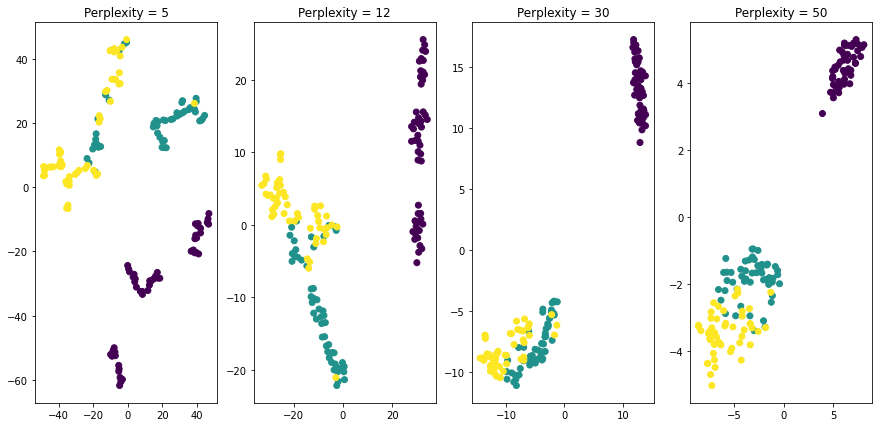

In [ ]:

# https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
from sklearn.manifold import TSNE


# Creamos subplots
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
# Generamos Perplejidades
for i, perp in enumerate([5,12, 30, 50]):
  # Usamos TSNE
    tsne = TSNE(perplexity=perp,random_state=123)
    # Vamos uniendo cada perpeplijdad segpun el componente
    x_embedded = tsne.fit_transform(df_pred[['principal_component_1','principal_component_2']])
    # De todos modos, todo esto es una forma larga de decir que los ejes de una 
    # gráfica t-SNE no son fácilmente interpretables en términos de los ejes / 
    # unidades de los datos originales de alta dimensión. Por tanto, no trataría 
    # de interpretar cuantitativamente una gráfica t-SNE; t-SNE es solo una técnica de visualización, nada más.
    # https://stats.stackexchange.com/questions/254090/what-are-the-axes-of-a-t-sne-scatterplot
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=df_pred['class'])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()


perplejidad, que se puede considerar como un acto de equilibrio entre la representación de la estructura local y los patrones globales en los datos.


La salida de un t-SNE se puede utilizar para explorar datos visualmente (para tener una idea del número apropiado de agrupaciones en un espacio de alta dimensión, por ejemplo), o como entrada en otro algoritmo directamente.

. Se podría aplicar un algoritmo de agrupamiento directamente a la salida de t-SNE para separar linealmente los grupos no lineales en los datos que encontró y construir una canalización de aprendizaje no supervisada precisa o útil.